In [2]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [5]:
#add the parent directory to the path
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

from src.loader import SlackDataLoader
from src.draw import Visualize
import src.utils as utils

In [6]:
#TO csv
paths = [
    '/home/biniyam/tenx-tasks/tenxdata/all-week8',
    '/home/biniyam/tenx-tasks/tenxdata/all-week9'
]

df_json = SlackDataLoader.slack_parser(paths)

df_json.to_csv('all-week8-9.csv', index=False)

#TO dataframe
df = pd.read_csv('all-week8-9.csv')

df.head()

/home/biniyam/tenac/tenx-tasks/src/loader.py:189: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['msg_sent_time'] = pd.to_datetime(df['msg_sent_time'], unit='s')
/home/biniyam/tenac/tenx-tasks/src/loader.py:190: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['time_thread_start'] = pd.to_datetime(df['time_thread_start'], unit='s')
/home/biniyam/tenac/tenx-tasks/src/loader.py:191: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a fu

,msg_type,msg_content,sender_name,msg_sent_time,msg_dist_type,time_thread_start,reply_count,reply_users_count,reply_users,tm_thread_end,channel
0,Message,<https://youtu.be/zoKn4qk4mac>,Kelly Soto,2022-10-15 12:45:52,Link,1970-01-01 00:00:00,0,0,[''],1970-01-01 00:00:00,all-week8
1,Message,<!channel> Daily standup has started,Garrett Bell,2022-10-11 08:04:16,Broadcast,1970-01-01 00:00:00,0,0,[''],1970-01-01 00:00:00,all-week8
2,Message,website from the current session (database des...,Brian Odom,2022-10-11 12:11:44,Text,2022-10-11 12:11:44,1,1,['U03UG0SFHGT'],2022-10-11 12:18:08,all-week8
3,Message,Thank you <@U03UJKJGRAQ>,Willie Yang,2022-10-11 12:18:08,Text,2022-10-11 12:11:44,0,0,[''],1970-01-01 00:00:00,all-week8
4,Message,can i get a recorded tutorial of today’s back...,Nancy Craig,2022-10-11 15:23:44,Text,2022-10-11 15:23:44,8,5,"['U03V6HMRPGQ', 'U03UG1Z21JP', 'U03UG5VFN03', ...",2022-10-12 07:06:40,all-week8


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   msg_type           189 non-null    object
 1   msg_content        189 non-null    object
 2   sender_name        189 non-null    object
 3   msg_sent_time      189 non-null    object
 4   msg_dist_type      189 non-null    object
 5   time_thread_start  189 non-null    object
 6   reply_count        189 non-null    int64 
 7   reply_users_count  189 non-null    int64 
 8   reply_users        189 non-null    object
 9   tm_thread_end      189 non-null    object
 10  channel            189 non-null    object
dtypes: int64(2), object(9)
memory usage: 16.4+ KB


In [8]:
#remove links
df['msg_content'] = df['msg_content'].apply(lambda x: re.sub(r'http\S+', '', x))

#remove punctuation
df['msg_content'] = df['msg_content'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

#remove numbers
df['msg_content'] = df['msg_content'].apply(lambda x: re.sub(r'\d+', '', x))

# #remove emojis
df['msg_content'] = df['msg_content'].apply(lambda x: utils.remove_emoji(x))

In [9]:
df.head(10)

,msg_type,msg_content,sender_name,msg_sent_time,msg_dist_type,time_thread_start,reply_count,reply_users_count,reply_users,tm_thread_end,channel
0,Message,,Kelly Soto,2022-10-15 12:45:52,Link,1970-01-01 00:00:00,0,0,[''],1970-01-01 00:00:00,all-week8
1,Message,channel Daily standup has started,Garrett Bell,2022-10-11 08:04:16,Broadcast,1970-01-01 00:00:00,0,0,[''],1970-01-01 00:00:00,all-week8
2,Message,website from the current session database desi...,Brian Odom,2022-10-11 12:11:44,Text,2022-10-11 12:11:44,1,1,['U03UG0SFHGT'],2022-10-11 12:18:08,all-week8
3,Message,Thank you UUJKJGRAQ,Willie Yang,2022-10-11 12:18:08,Text,2022-10-11 12:11:44,0,0,[''],1970-01-01 00:00:00,all-week8
4,Message,can i get a recorded tutorial of todays back ...,Nancy Craig,2022-10-11 15:23:44,Text,2022-10-11 15:23:44,8,5,"['U03V6HMRPGQ', 'U03UG1Z21JP', 'U03UG5VFN03', ...",2022-10-12 07:06:40,all-week8
5,Message,UTEPYRMP can we,Cristian Wilson,2022-10-11 15:30:08,User,2022-10-11 15:23:44,0,0,[''],1970-01-01 00:00:00,all-week8
6,Message,I joined late due to internet issues I would l...,Jennifer Foley,2022-10-11 15:42:56,Text,2022-10-11 15:23:44,0,0,[''],1970-01-01 00:00:00,all-week8
7,Message,I was ateneded but I need some part of it,Nancy Craig,2022-10-11 15:45:04,Text,2022-10-11 15:23:44,0,0,[''],1970-01-01 00:00:00,all-week8
8,Message,Sure The upload is in progress,Garrett Bell,2022-10-11 16:06:24,Text,2022-10-11 15:23:44,0,0,[''],1970-01-01 00:00:00,all-week8
9,Message,Thank you so much,Nancy Craig,2022-10-11 16:06:24,Text,2022-10-11 15:23:44,0,0,[''],1970-01-01 00:00:00,all-week8


In [10]:
#do topic modeling on msg_content

#vectorize
vectorizer = CountVectorizer(stop_words='english')
data_vectorized = vectorizer.fit_transform(df['msg_content'])

#build lda model
lda_model = LatentDirichletAllocation(n_components=10, max_iter=100, learning_method='online')
lda_Z = lda_model.fit_transform(data_vectorized)

Welp, let's see what the model did to the tokens

In [11]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx + 1))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10

feature_names = vectorizer.get_feature_names_out()
display_topics(lda_model, feature_names, no_top_words)

Topic 1:
submission work today does challenge document mean order_id trip tomorrow
Topic 2:
trip longitude latitude order second id coordinate set nbcsv got
Topic 3:
order data vs using utc submission pm rain use types
Topic 4:
week morning good training data light tunnel youve blush ahead
Topic 5:
thank python uuura trip version uufnpeux torch uujgpc origin installed
Topic 6:
common join tables session column issue need right merge think
Topic 7:
install updated pip yes sudo aptget conda uujgpc dates installing
Topic 8:
val val_end utepyrmp trip link think distance understand created_at time
Topic 9:
today thank provided posted lot attend try nice classroom uttkeycf
Topic 10:
thanks ok try indicator career manlet exercise oh range referring


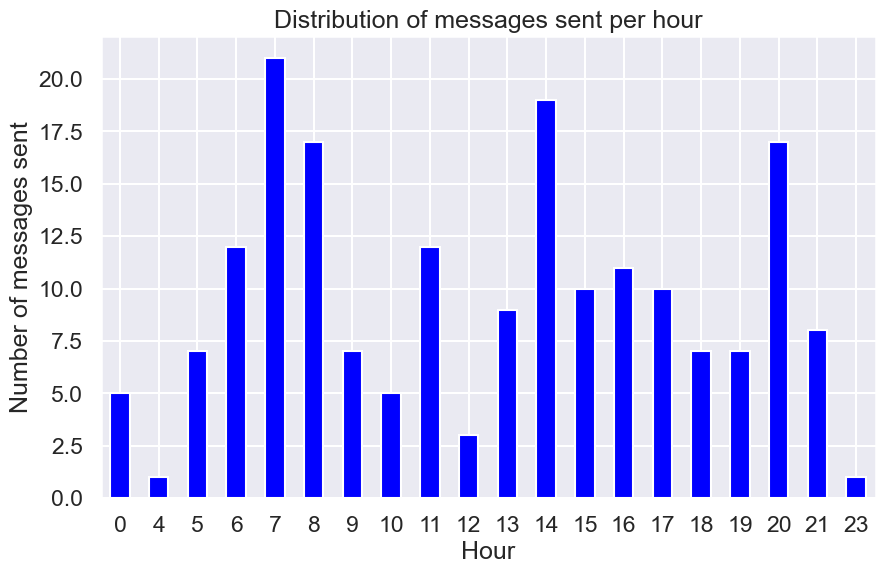

In [12]:
#plot a distribution of msg_sent_time

df['msg_sent_time'] = pd.to_datetime(df['msg_sent_time'])

# df['msg_sent_time'].dt.hour.value_counts().sort_index().plot(kind='bar')

#make the plot prettier

sns.set_style('darkgrid')
sns.set_context('talk')

df['msg_sent_time'].dt.hour.value_counts().sort_index().plot(kind='bar', figsize=(10, 6), color='blue')
plt.title('Distribution of messages sent per hour')
plt.xlabel('Hour')
plt.ylabel('Number of messages sent')
plt.xticks(rotation=0)
plt.show()



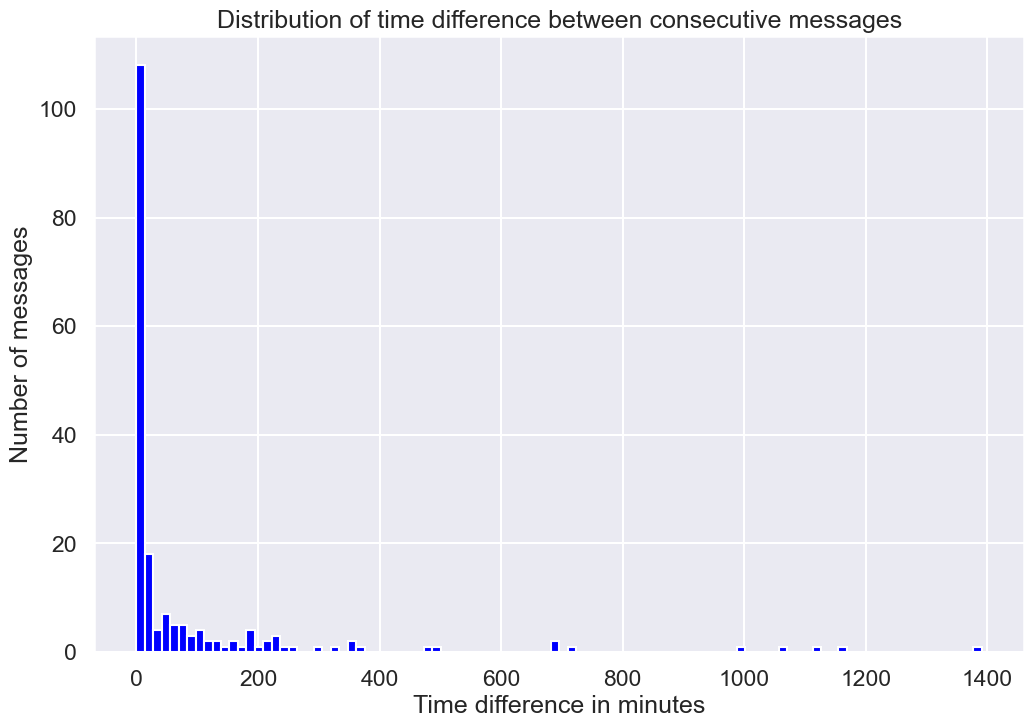

In [18]:
#hist for time difference betweeen consecutive messages

df['time_diff'] = df['msg_sent_time'].diff().dt.seconds.div(60, fill_value=0)

df['time_diff'].hist(bins=100, figsize=(12, 8), color='blue')
plt.title('Distribution of time difference between consecutive messages')
plt.xlabel('Time difference in minutes')
plt.ylabel('Number of messages')
plt.show()




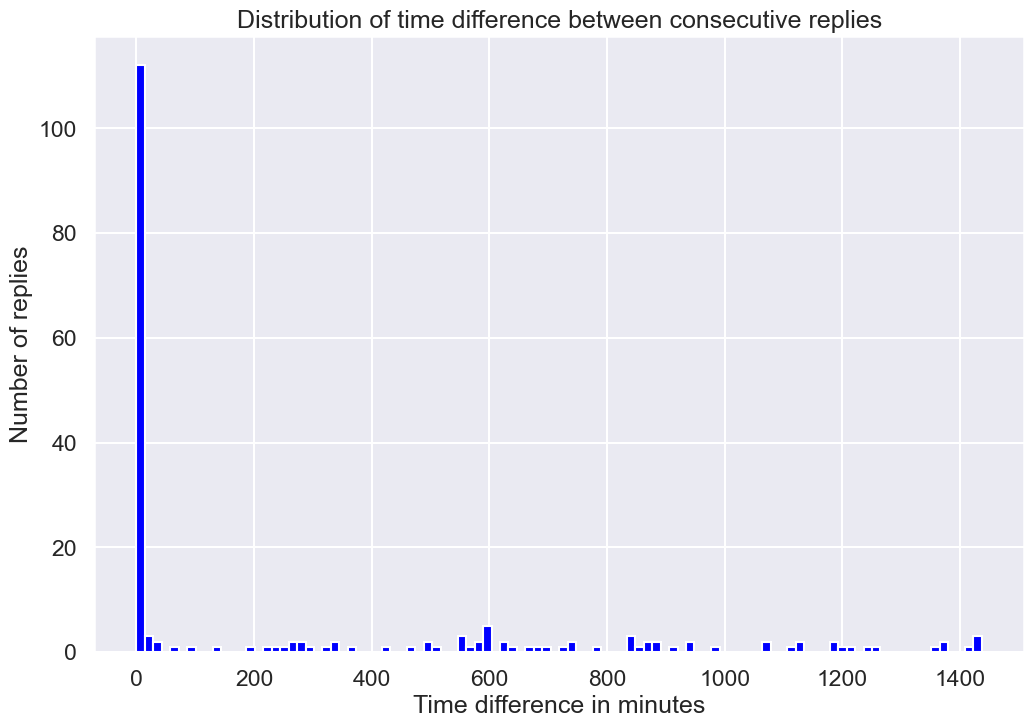

In [19]:
#hist for time difference between consecutive replies
df['time_thread_start'] = pd.to_datetime(df['time_thread_start'])

df['time_diff'] = df['time_thread_start'].diff().dt.seconds.div(60, fill_value=0)

df['time_diff'].hist(bins=100, figsize=(12, 8), color='blue')
plt.title('Distribution of time difference between consecutive replies')
plt.xlabel('Time difference in minutes')
plt.ylabel('Number of replies')
plt.show()

In [20]:
df.head()

,msg_type,msg_content,sender_name,msg_sent_time,msg_dist_type,time_thread_start,reply_count,reply_users_count,reply_users,tm_thread_end,channel,time_diff
0,Message,,Kelly Soto,2022-10-15 12:45:34.076498985,Link,1970-01-01 00:00:00.000000000,0,0,[''],1970-01-01 00:00:00.000000000,all-week8,0.000000
1,Message,channel Daily standup has started,Garrett Bell,2022-10-11 08:05:07.168689013,Broadcast,1970-01-01 00:00:00.000000000,0,0,[''],1970-01-01 00:00:00.000000000,all-week8,0.000000
2,Message,website from the current session database desi...,Brian Odom,2022-10-11 12:11:59.589579105,Text,2022-10-11 12:11:59.589579105,1,1,['U03UG0SFHGT'],2022-10-11 12:17:28.418598890,all-week8,731.983333
3,Message,Thank you UUJKJGRAQ,Willie Yang,2022-10-11 12:17:28.418598890,Text,2022-10-11 12:11:59.589579105,0,0,[''],1970-01-01 00:00:00.000000000,all-week8,0.000000
4,Message,can i get a recorded tutorial of todays back ...,Nancy Craig,2022-10-11 15:24:40.342719078,Text,2022-10-11 15:24:40.342719078,8,5,"['U03V6HMRPGQ', 'U03UG1Z21JP', 'U03UG5VFN03', ...",2022-10-12 07:05:49.600599051,all-week8,192.666667


In [21]:
#group all messages by day

df['msg_sent_time'] = pd.to_datetime(df['msg_sent_time'])
df['msg_sent_day'] = df['msg_sent_time'].dt.date

df.head()

,msg_type,msg_content,sender_name,msg_sent_time,msg_dist_type,time_thread_start,reply_count,reply_users_count,reply_users,tm_thread_end,channel,time_diff,msg_sent_day
0,Message,,Kelly Soto,2022-10-15 12:45:34.076498985,Link,1970-01-01 00:00:00.000000000,0,0,[''],1970-01-01 00:00:00.000000000,all-week8,0.000000,2022-10-15
1,Message,channel Daily standup has started,Garrett Bell,2022-10-11 08:05:07.168689013,Broadcast,1970-01-01 00:00:00.000000000,0,0,[''],1970-01-01 00:00:00.000000000,all-week8,0.000000,2022-10-11
2,Message,website from the current session database desi...,Brian Odom,2022-10-11 12:11:59.589579105,Text,2022-10-11 12:11:59.589579105,1,1,['U03UG0SFHGT'],2022-10-11 12:17:28.418598890,all-week8,731.983333,2022-10-11
3,Message,Thank you UUJKJGRAQ,Willie Yang,2022-10-11 12:17:28.418598890,Text,2022-10-11 12:11:59.589579105,0,0,[''],1970-01-01 00:00:00.000000000,all-week8,0.000000,2022-10-11
4,Message,can i get a recorded tutorial of todays back ...,Nancy Craig,2022-10-11 15:24:40.342719078,Text,2022-10-11 15:24:40.342719078,8,5,"['U03V6HMRPGQ', 'U03UG1Z21JP', 'U03UG5VFN03', ...",2022-10-12 07:05:49.600599051,all-week8,192.666667,2022-10-11


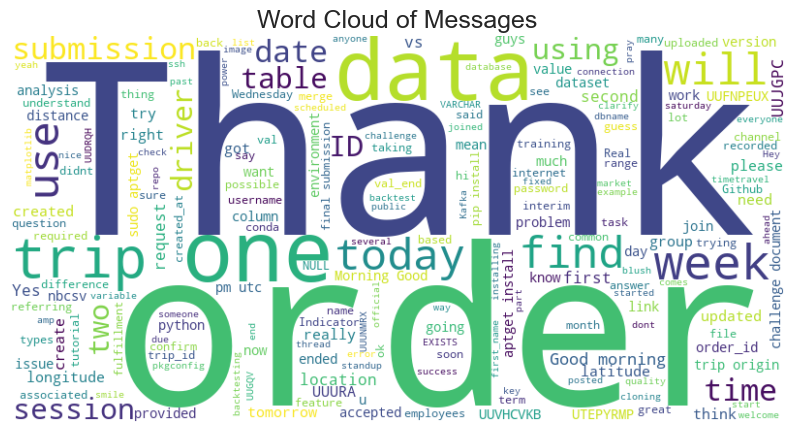

In [22]:
from wordcloud import WordCloud
df['msg_sent_time'] = pd.to_datetime(df['msg_sent_time'])

# Group messages by date and concatenate them into a single string for each date
grouped = df.groupby(df['msg_sent_time'].dt.date)['msg_content'].apply(' '.join).reset_index()

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(grouped['msg_content']))

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Messages')
plt.show()

In [24]:
#display the grouped messages with date


# Group messages by date and concatenate them into a single string for each date
grouped = df.groupby(df['msg_sent_time'].dt.date)['msg_content'].apply(' '.join).reset_index()

#show the grouped messages
grouped.head()

,msg_sent_time,msg_content
0,2022-10-10,Good morning everyone blush welcome to week o...
1,2022-10-11,channel Daily standup has started website from...
2,2022-10-12,That is the maximum quality we received from G...
3,2022-10-13,hi UTEPYRMP i know todays tutorial session jus...
4,2022-10-14,Always there UUVHCVKB praythank you Kindly fin...


In [ ]:
#Perform basic sentiment analysis on the messages
grouped['sentiment'] = grouped['msg_content'].apply(lambda x: utils.sentiment(x))